In [1]:
library(tidyverse)
#install.packages('FSA')
#library(FSA)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
install.packages("nnet")
install.packages("MASS")
#install.packages("ggplot2")
#install.packages("effects")
library(nnet)
library(MASS)
#library(ggplot2)
#library(effects)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Rutoxicon is the corpus of toxic comments gathered from Internet forums such as Pikabu and Dvach. For this corpus the comments were collected and annotated manually by following criteria:
  - text: the text of the comment itself
  - tox: the sentence or a large phrase that contains toxic message
  - tox_rate: the rate of toxicity - how offensive and cruel the comment is based on the scale from 1 to 10, 1 being the lowest grade and 10 the highest, referring to the most insulting, hurtful comments
  - phrase: the minimal toxic phrase
  - phrase_types: type of the phrase based on the way toxicity was explicited: direct and indirect - metaphors
  - lex: the toxic lexeme itself
  - lex_counts: the amount of lexemes in the toxic phrase

#**DATA ANALYSIS AND VISUALIZATION**

In [38]:
tox <- read.csv("rutoxicon.csv", stringsAsFactors = TRUE)
summary(tox)

    text_id      
 Min.   :   0.0  
 1st Qu.: 283.0  
 Median : 539.0  
 Mean   : 549.3  
 3rd Qu.: 827.8  
 Max.   :1097.0  
                 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text     
 Игорь, ты? Помнишь меня? Я твой одноклассник. Я узнал тебя по твоим шизоидным словам и высерам . А помнишь, как мы всем классом нассали тебе в кружку в тре

In [ ]:
glimpse(tox)

Rows: 1,610
Columns: 10
$ text_id      <int> 0, 1, 1, 1, 2, 2, 3, 4, 5, 5, 6, 7, 8, 8, 9, 10, 11, 12, …
$ text         <fct> "Кармодрочеры", "Да блять ! 🤦 Он не взламывал игры, а сим…
$ tox          <fct> "Кармодрочеры", "Да блять ! 🤦 Он не взламывал игры, а сим…
$ tox_rate     <int> 4, 5, 5, 5, 8, 8, 5, 1, 7, 7, 5, 6, 8, 8, 6, 9, 7, 6, 4, …
$ response     <fct> post: animate, post: animate, post: animate, post: animat…
$ tox_type     <fct> general_insult, profanity, profanity, profanity, profanit…
$ phrases      <fct> "Кармодрочеры", "Да блять !", "Это дохуя разные вещи", "Т…
$ phrase_types <fct> direct, direct, direct, direct, direct, direct, direct, d…
$ lexes        <fct> "Кармодрочеры", "блять", "дохуя", "ахуенной", "охуели", "…
$ lex_counts   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 5, 2, 1, 1, …


In [ ]:
head(tox)

,text_id,text,tox,tox_rate,response,tox_type,phrases,phrase_types,lexes,lex_counts
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,0,Кармодрочеры,Кармодрочеры,4,post: animate,general_insult,Кармодрочеры,direct,Кармодрочеры,1
2,1,"Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.","Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.",5,post: animate,profanity,Да блять !,direct,блять,1
3,1,"Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.","Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.",5,post: animate,profanity,Это дохуя разные вещи,direct,дохуя,1
4,1,"Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.","Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.",5,post: animate,profanity,Так что про пирата - тут с ахуенной натяжкой.,direct,ахуенной,1
5,2,Вы там охуели что-ли за 6500 стрижка ? Это где блять такое?,Вы там охуели что-ли за 6500 стрижка ? Это где блять такое?,8,post: inanimate,profanity,Вы там охуели что-ли за 6500 стрижка,direct,охуели,1
6,2,Вы там охуели что-ли за 6500 стрижка ? Это где блять такое?,Вы там охуели что-ли за 6500 стрижка ? Это где блять такое?,8,post: inanimate,profanity,Это где блять такое?,direct,блять,1


We will start our analysis by taking a look at the specifics of each toxicity type.

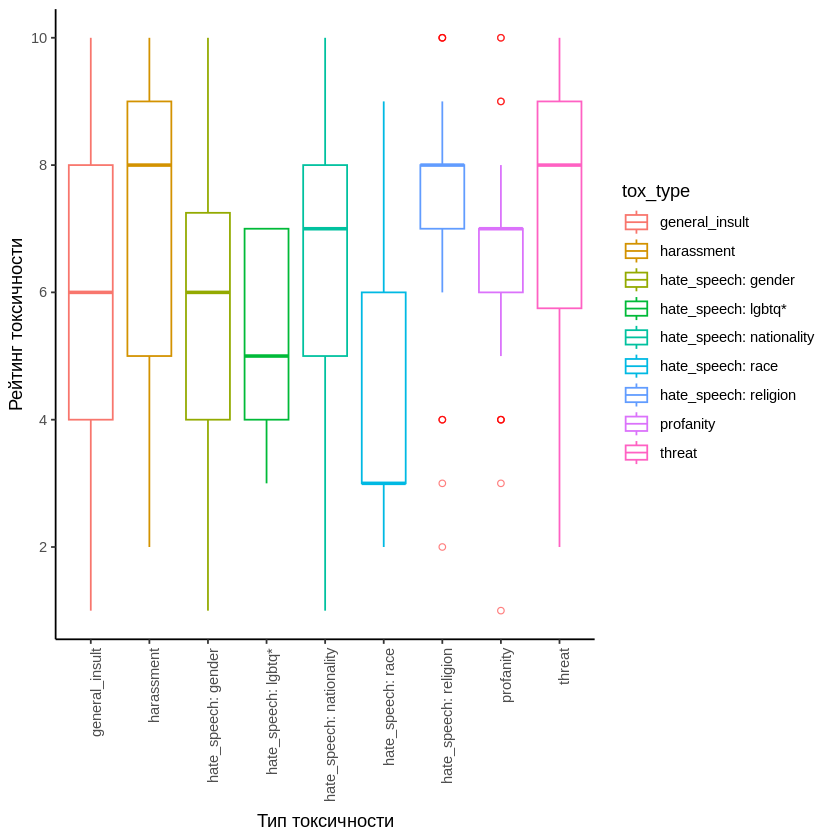

In [ ]:
tox %>%
  ggplot(aes(x=tox_type, y = tox_rate))+
  geom_boxplot(aes(color=tox_type), outlier.colour = "red", outlier.shape = 1, outlier.alpha = 0.5)+
  xlab('Тип токсичности')+
  ylab('Рейтинг токсичности')+
  scale_y_continuous(breaks =c(0,2,4,6,8,10))+
  theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

*Here the average ratings of different toxicity types are shown.*

Threats, harassment and hate_speech: religion on average are *the **most** toxic*.

The types showing ***medium*** *toxicity* are general_insult, hate_speech: gender, hate_speech: lgbtq* and hate_speech: nationality.

The ***least*** *toxic* category is hate_speech: race.

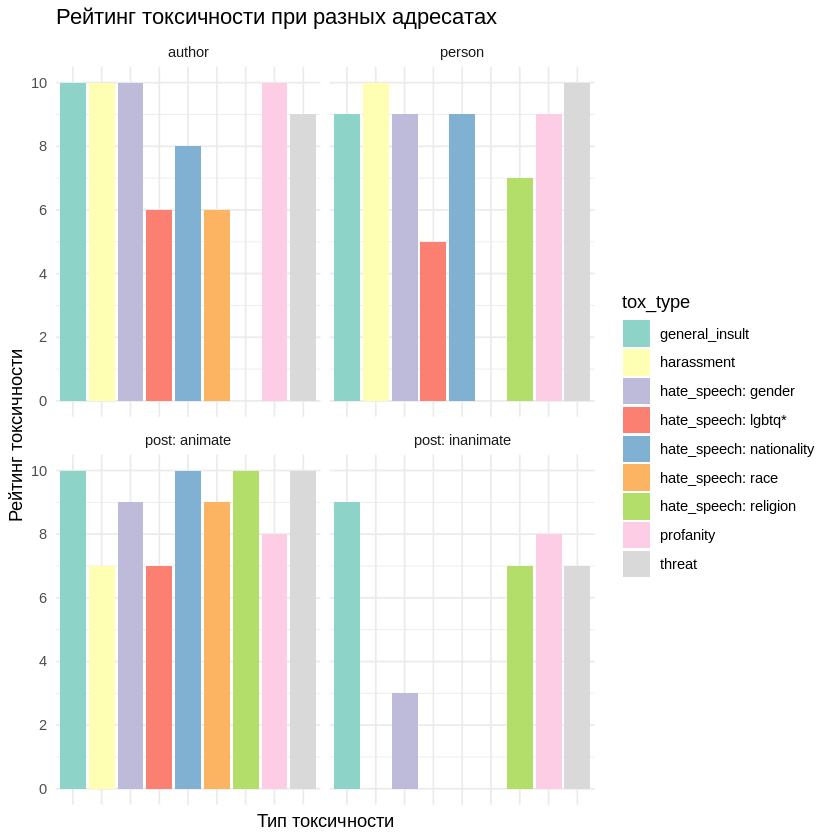

In [ ]:
tox %>%
  ggplot(aes(x = tox_type, y = tox_rate, fill = tox_type))+
  geom_bar(stat = 'identity', position = 'dodge')+
  theme_minimal()+
  ggtitle('Рейтинг токсичности при разных адресатах')+
  xlab('Тип токсичности')+
  ylab('Рейтинг токсичности')+
  scale_y_continuous(breaks=c(0, 2, 4, 6, 8, 10))+
  scale_fill_brewer(palette = "Set3")+
  theme(axis.text.x = element_blank())+
  facet_wrap(~response)

*This plot shows the most toxic types of comments separated based on the recipient.*

* Directed at the ***author*** of the post, the most toxic types are general insult, harassment, gender-based hate speech and profanity, with religion-based hate speech not present at all.

* Directed at another ***commenter*** (person), the most toxic types are threats and harassment, with race-based hate speech not present.

* Directed at someone ***animate*** in the post, the toxicity types encountered are more or less evenly distributed in terms of toxicity rates.

* Directed at something ***inanimate***, the most toxic comments are of the general insult category, with harassment, lgbtq, nationality and race based hate speech not present, which is quite logical, considering the inanimate nature of the object of toxicity. It is interesting, however, that there is a high level of toxicity (7-8) in the category of religion-based hate speech, which can be seen as unexpected, however, toxic comments were often directed at religious texts, for instance, Quran.

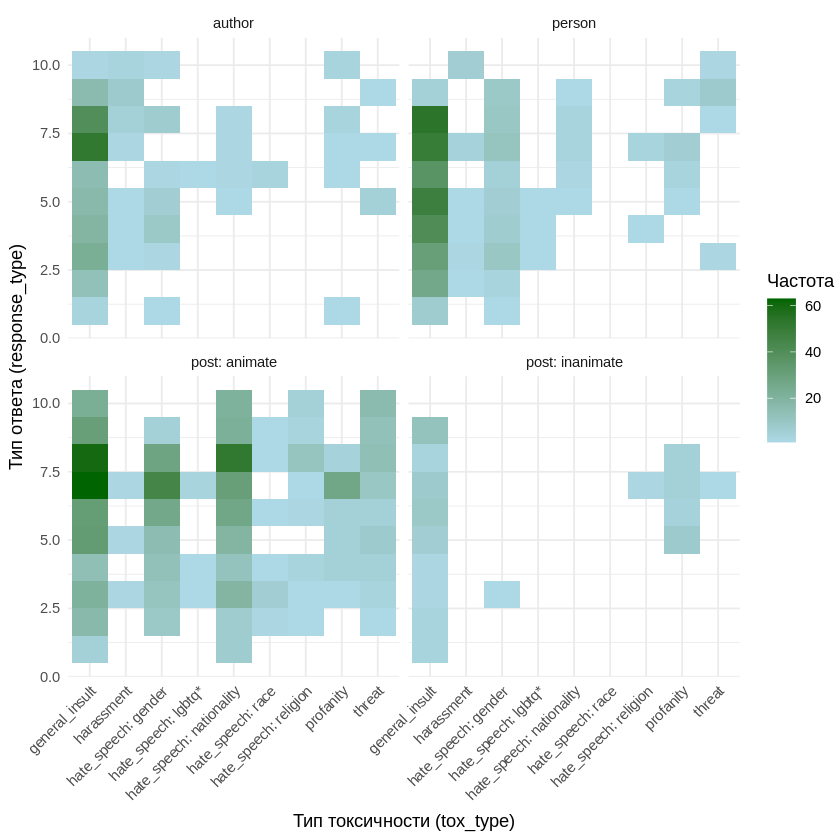

In [ ]:
frequency_data <- tox %>%
  group_by(tox_rate, response, tox_type) %>%
  summarise(frequency = n(), .groups = 'drop')

ggplot(frequency_data, aes(x = tox_type, y = tox_rate, fill = frequency)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkgreen") +
  labs(x = "Тип токсичности (tox_type)",
       y = "Тип ответа (response_type)",
       fill = "Частота") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  facet_wrap(~response)

*This plot shows the relationship between toxicity types, ratings and recipients.*

It can be seen that the most common toxic type of comment directed at ***all categories*** is general_insult, with the highest frequency of such comments being around 7.

As for the ***author*** of the post, there is also a small spike of frequency around the rating of 5 in the hate_speech: gender category. Overall, I would consider the comments directed at the author as quite toxic as there is very few low frequencies in the first heatmap.

It is a similar picture with comments directed at another ***person***, although a small increase in frequency can be seen in the threat type at the 9 rating. I would also count this category as very toxic.

The frequency distribution across rating and types is more even when it comes to ***post: animate***, with a high amount of comments being of hate_speech: gender with the rating of 7 and hate_speech: nationality with the rating of 8. There is also a small spike in profanity at the rating of 7. The rest of the categories are quite even in the frequency of their ratings.

The ***post: inanimate*** category is very interesting. It would seem that most of these comments were tagged with general_insult with the rare exceptions being profanity, hate_speech: religion, gender and threats. Their toxicity can be described as even with no apparent spikes at any rating.

Warning message in geom_histogram(stat = "count", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


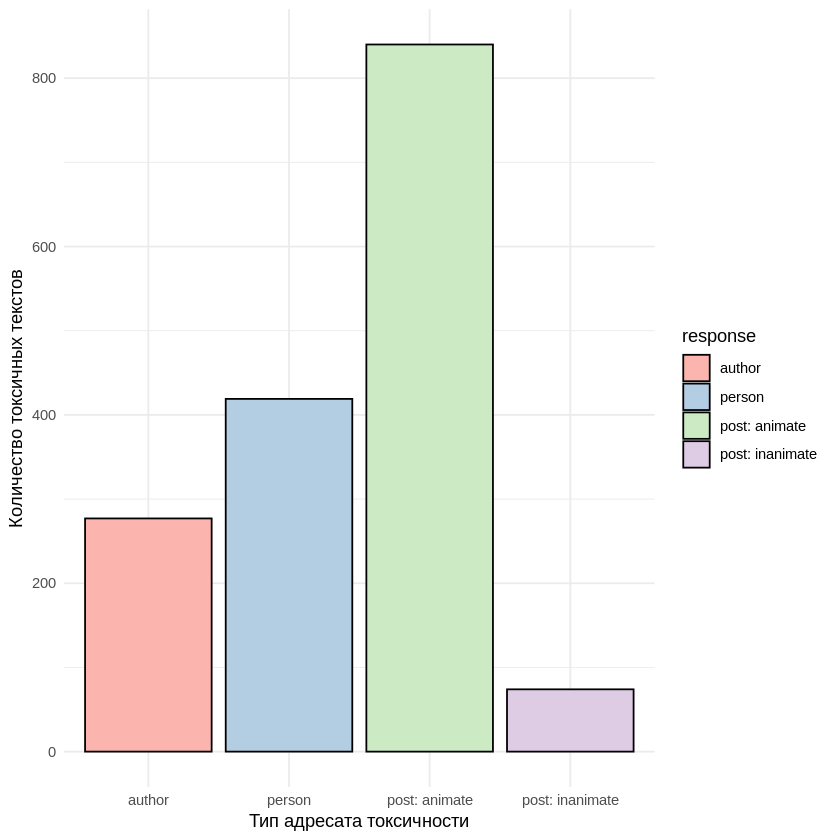

In [ ]:
tox%>%
  ggplot(aes(response, fill=response))+
  geom_histogram(stat="count", color = "black")+
  theme_minimal()+
  xlab('Тип адресата токсичности')+
  ylab('Количество токсичных текстов')+
  scale_fill_brewer(palette = "Pastel1")

*To further analyze the comment recipients, let's take a look at this plot.*

We can see that the comments, directed at something ***inanimate*** within the post are *the **least** frequent* in the dataset.

On the contrary to that, comments, directed at someone ***animate*** are the ***most*** *frequent*.

Comments directed at the author of the post and other commenters are encountered with an ***average*** *frequency*

#**ANALYSIS OF PHRASES WITHIN THE COMMENTS**

One of the key aspects of my personal research were phrases and types of phrases (direct and indirect) within toxic comments.

Warning message in geom_histogram(stat = "count", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


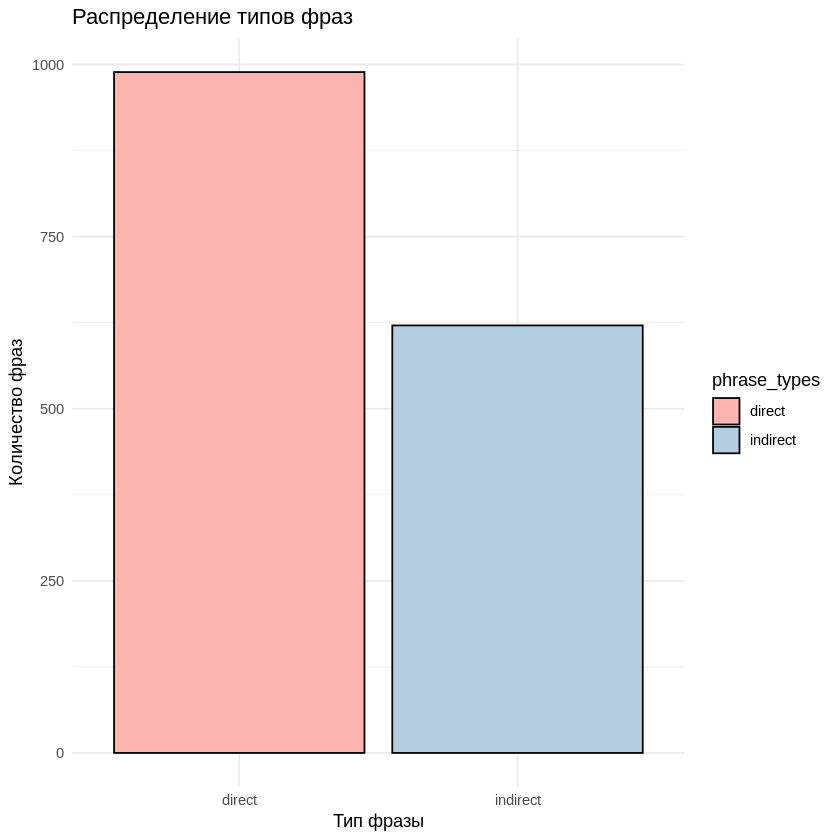

In [ ]:
tox%>%
  ggplot(aes(phrase_types, fill=phrase_types))+
  geom_histogram(stat="count", color = "black")+
  ggtitle("Распределение типов фраз")+
  theme_minimal()+
  xlab('Тип фразы')+
  ylab('Количество фраз')+
  scale_fill_brewer(palette = "Pastel1")

As can be seen in this histogram, direct phrases are almost twice as common than indirect, which can be explained by the ruthless and straightforward nature of pikabu commenters.

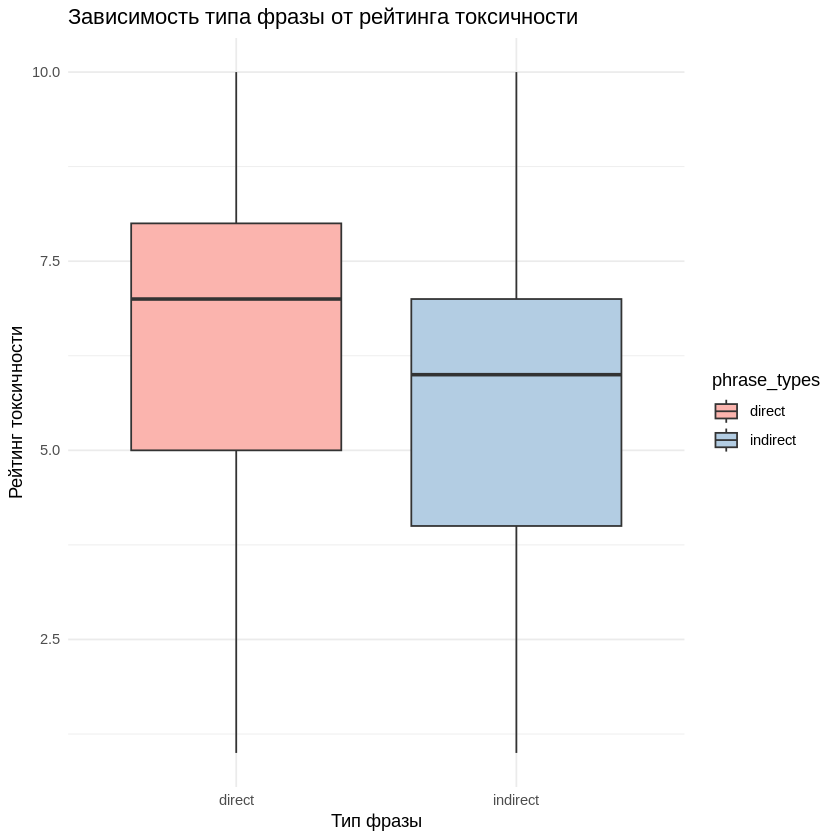

In [ ]:
tox %>%
  ggplot(aes(x = phrase_types, y = tox_rate, fill = phrase_types))+
  geom_boxplot()+
  theme_minimal()+
  ggtitle("Зависимость типа фразы от рейтинга токсичности")+
  xlab('Тип фразы')+
  ylab('Рейтинг токсичности')+
  scale_fill_brewer(palette = "Pastel1")

As for toxicity, we can see that the direct phrase type is more toxic. It can be explained by the fact that indirect phrases were far milder in nature and they can be even described as...creative, for instance:

> <phrase type="indirect">Мадам, больше не пишите, токсины от той свеклы повлияли на синтаксическую область мозга))</phrase>

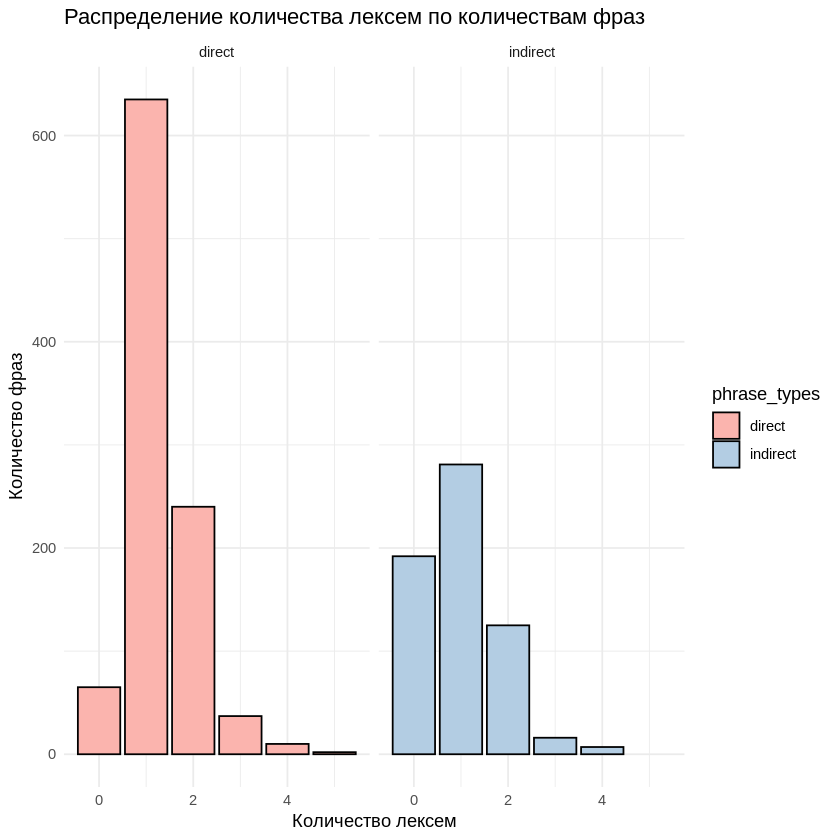

In [ ]:
tox%>%
  group_by(phrase_types) %>%
  ggplot(aes(x=lex_counts, fill = phrase_types))+
  geom_bar(stat='count', color= 'black')+
  theme_minimal()+
  ggtitle('Распределение количества лексем по количествам фраз')+
  xlab('Количество лексем')+
  ylab('Количество фраз')+
  scale_fill_brewer(palette = "Pastel1")+
  facet_wrap(~phrase_types)

*As we have informations on the amount of toxic words within a phrase, we can visualize the difference between phrase types based on that.*

The *most **frequent** amount* of toxic lexemes within a phrase is **one**, both in direct and indirect.

In **direct** phrases five toxic lexemes can be encountered, although it is quite rare. Zero, three and four words are also rare, with another peak occuring at two.

The biggest amount of toxic words per **indirect** phrase is four. The distribution here is more even, with zero and two words being encountered in a similar amount of phrases, with zero being slightly higher. Three and four are, like in direct phrases, quite rare.

In [ ]:
phrase_count <- tox %>%
  group_by(tox)%>%
  count('phrases')

In [ ]:
glimpse(phrase_count)

Rows: 1,098
Columns: 3
Groups: tox [1,098]
$ tox         <fct> "- Ты кого тут тупым быком обозвал? А ну ка!", "-- Насколь…
$ `"phrases"` <chr> "phrases", "phrases", "phrases", "phrases", "phrases", "ph…
$ n           <int> 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1…


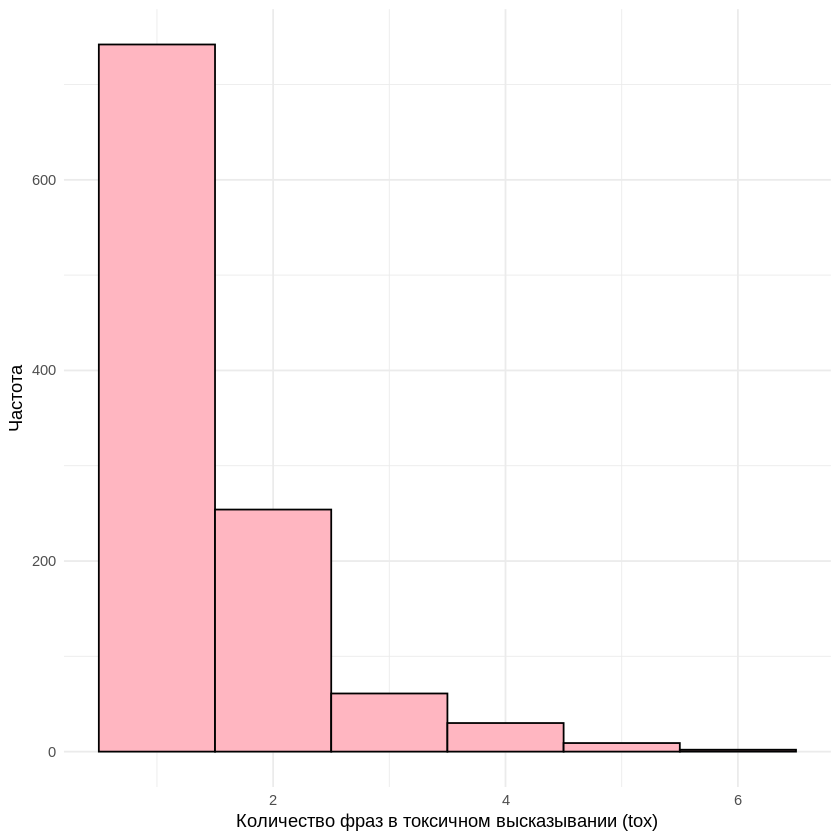

In [ ]:
ggplot(phrase_count, aes(x = n)) +
  geom_histogram(binwidth = 1, fill = "lightpink", color = "black") +
  xlab('Количество фраз в токсичном высказывании (tox)')+
  ylab('Частота')+
  theme_minimal()

*We can also visualize the distribution of phrases within toxic comments.*

The most common amount of phrases is **one**, with six being the very rare maximum. Two phrases are almost twice as rare as one, while three, four and five phrases are quite uncommon.

#**STATISTICAL TESTS ON ALL DATA**

For testing our future hypothesises we need to verify how our data is distributed as it could affect the methods that we are going to use. In order to check whether our data falls into normal distribution or not we decided to use ***Shapiro-Wilcox*** test. Our null hypothesis is that the data is distributed normally.

H0: data is distributed normally

In [ ]:
shapiro.test(tox$tox_rate)


	Shapiro-Wilk normality test

data:  tox$tox_rate
W = 0.95022, p-value < 2.2e-16


Based on the results of the Shapiro test (W = 0.95022, p-value < 2.2e-16) we have reason to reject the null hypothesis and claim that the data is distributed abnormally.




--------------------

H0: Type of toxic comment has no influence on the toxic rate of the comment

H1: Type of toxic comment has influence on the toxic rate of the comment

As the toxic rate is a discrete variable and type of toxicity is a categorical variable, we are going to use ***chi-squared test***.

In [ ]:
tox.tabulated <- tox %>%
  select(tox_rate, tox_type) %>%
  table()
tox.tabulated

        tox_type
tox_rate general_insult harassment hate_speech: gender hate_speech: lgbtq*
      1              18          0                   2                   0
      2              59          1                  12                   0
      3              77          5                  24                   2
      4              76          2                  29                   2
      5             104          4                  27                   1
      6              93          0                  33                   1
      7             173          8                  56                   3
      8             157          5                  45                   0
      9              64          8                  14                   0
      10             25          9                   2                   0
        tox_type
tox_rate hate_speech: nationality hate_speech: race hate_speech: religion
      1                         7                 0                

As we can see a lot of classes do not have all the presented ratings scores. So, in order to calculate the chi-score correctly we are going to delete columns: hate_speech: race, hate_speech: religion, harassment, hate_speech: lgbtq*, and rows: 1, 2, 3

In [ ]:
tox.tab_short <- tox.tabulated[-c(1,2,3), -c(2, 4, 6, 7)]
tox.tab_short

        tox_type
tox_rate general_insult hate_speech: gender hate_speech: nationality profanity
      4              76                  29                       12         5
      5             104                  27                       21        14
      6              93                  33                       31        13
      7             173                  56                       36        39
      8             157                  45                       57        12
      9              64                  14                       23         3
      10             25                   2                       21         3
        tox_type
tox_rate threat
      4       5
      5      13
      6       5
      7      12
      8      15
      9      22
      10     18

--------
H0: Type of toxic comment has no influence on the toxic rate of the comment

H1: Type of toxic comment has influence on the toxic rate of the comment

--------

In [ ]:
tox.chisq <- chisq.test(tox.tabulated)
tox.chisq

Warning message in chisq.test(tox.tabulated):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tox.tabulated
X-squared = 260.28, df = 72, p-value < 2.2e-16


In [ ]:
round(tox.chisq$expected, 1)

,general_insult,harassment,hate_speech: gender,hate_speech: lgbtq*,hate_speech: nationality,hate_speech: race,hate_speech: religion,profanity,threat
1,14.7,0.7,4.2,0.2,4.1,0.3,0.6,1.6,1.7
2,43.6,2.2,12.6,0.5,12.1,0.8,1.7,4.7,4.9
3,73.6,3.7,21.2,0.8,20.3,1.3,2.9,7.9,8.3
4,71.5,3.5,20.6,0.8,19.8,1.3,2.8,7.7,8.1
5,96.7,4.8,27.9,1.0,26.7,1.7,3.8,10.4,11.0
6,95.6,4.7,27.6,1.0,26.5,1.7,3.7,10.3,10.9
7,175.0,8.7,50.5,1.9,48.4,3.1,6.8,18.8,19.9
8,159.2,7.9,45.9,1.7,44.0,2.8,6.2,17.1,18.1
9,72.5,3.6,20.9,0.8,20.1,1.3,2.8,7.8,8.2
10,43.6,2.2,12.6,0.5,12.1,0.8,1.7,4.7,4.9


Based on the results of the chi-squared test on original data (X-squared = 260.28, df = 72, p-value < 2.2e-16) we can reject the null hypthesis and claim that type of toxic comment has influence on the toxic rate of the comment.

For a correct estimate we have to know that at least 80% of expected values should be more than 5, which is not the case here. This means that we need to look at the shortened data.

In [ ]:
tox.chisq_short <- chisq.test(tox.tab_short)
tox.chisq_short

Warning message in chisq.test(tox.tab_short):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tox.tab_short
X-squared = 132.36, df = 24, p-value < 2.2e-16


Based on the results of the chi-squared test on shortened data (X-squared = 132.36, df = 24, p-value < 2.2e-16) we can reject the null hypthesis and claim that type of toxic comment has influence on the toxic rate of the comment.

In [ ]:
round(tox.chisq_short$expected, 1)

,general_insult,hate_speech: gender,hate_speech: nationality,profanity,threat
1,15.7,4.5,4.3,1.7,1.8
2,44.2,12.8,12.2,4.8,5.0
3,70.5,20.3,19.5,7.6,8.0
4,71.1,20.5,19.7,7.6,8.1
5,100.2,28.9,27.7,10.8,11.4
6,98.0,28.3,27.1,10.5,11.1
7,176.9,51.0,48.9,19.0,20.1
8,160.1,46.2,44.3,17.2,18.2
9,70.5,20.3,19.5,7.6,8.0
10,38.6,11.1,10.7,4.2,4.4


At least 80% of expected values are more than 5.

From this table follows that certain types of toxic comment tend to have certain rating scores, for example "profanity" can be usually interpret as middle-toxicity, having the toxic ratings around 5-8.

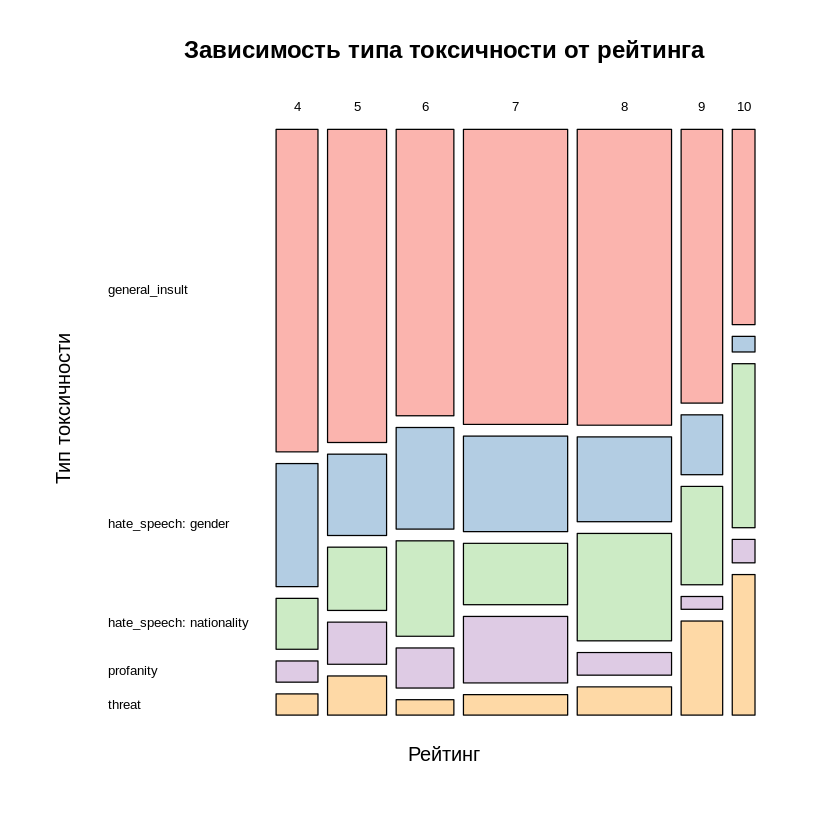

In [ ]:
colours <- brewer.pal(n = ncol(tox.tab_short), name = 'Pastel1')
mosaicplot(tox.tab_short,main="Зависимость типа токсичности от рейтинга",
          xlab = 'Рейтинг',
          ylab = 'Тип токсичности',
          col = colours,
          las = 1)

It can be seen that the most common types across all ratings are general_insult and hate_speech: gender.

The most toxic types at the rate of 10 are threat and hate_speech: nationality

The most underrepresented categories are profanity and threat

#**STATISTICAL TESTS ON PHRASES**

--------
H0: Type of phrase has no influence on the toxic rate of the comment

H1: Type of phrase has influence on the toxic rate of the comment

--------

        phrase_types
tox_rate direct indirect
      1      14       14
      2      33       50
      3      65       75
      4      67       69
      5     104       80
      6      99       83
      7     237       96
      8     209       94
      9      89       49
      10     72       11


	Pearson's Chi-squared test

data:  tox.phrase
X-squared = 89.077, df = 9, p-value = 2.493e-15


Warning message in brewer.pal(n = ncol(tox.phrase), name = "Pastel1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


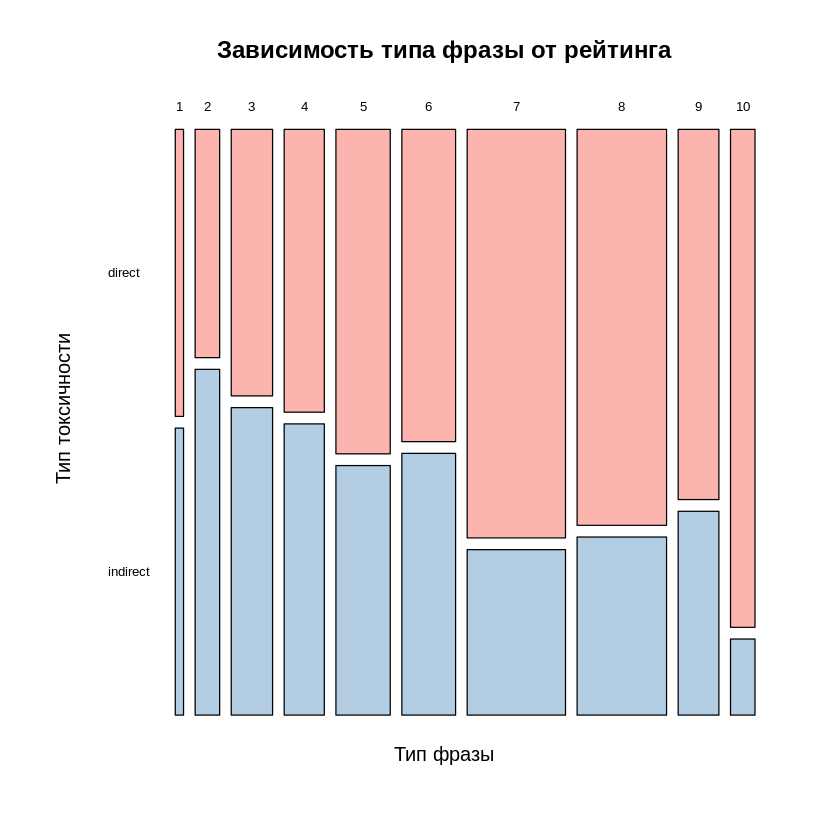

In [ ]:
tox.phrase <- tox %>%
  select(tox_rate, phrase_types) %>%
  table()
tox.phrase
phrase.chisq <- chisq.test(tox.phrase)
phrase.chisq
col1 <- brewer.pal(n = ncol(tox.phrase), name = 'Pastel1')
mosaicplot(tox.phrase,main="Зависимость типа фразы от рейтинга",
          xlab = 'Тип фразы',
          ylab = 'Тип токсичности',
          col = col1,
          las = 1)

Based on the results of the chi-squared test on shortened data (X-squared = 89.077, df = 9, p-value = 2.493e-15) we can reject the null hypthesis and claim that the phrase type has influence on the toxic rate of the comment.

The direct phrase type prevails in the most toxic ratings: from 7 to 10, while indirect phrases are more frequent at the rating of 2, with the rest of the ratings being more or less even between the two categories.

--------
H0: There is no significant difference between the toxicity of phrase types

H1: The toxicity rating is higher in direct phrases

--------

In [ ]:
t.test(tox_rate ~ phrase_types, data=tox)


	Welch Two Sample t-test

data:  tox_rate by phrase_types
t = 8.4969, df = 1261.7, p-value < 2.2e-16
alternative hypothesis: true difference in means between group direct and group indirect is not equal to 0
95 percent confidence interval:
 0.7419221 1.1873742
sample estimates:
  mean in group direct mean in group indirect 
              6.581395               5.616747 


Based on the results of the Welch Two Sample t-test (t = 8.4969, df = 1261.7, p-value < 2.2e-16) we can reject the null hypthesis and claim that the toxicity rating is higher in direct phrases

The mean of the direct group (6.58) is  higher compared to the indirect group (5.62)

The p-value (p-value < 2.2e-16) shows that this difference is statistically significant.

#**BUILDING A MODEL**

We decided to see if it was possible to predict the toxicity rating of the comment based on all of the information provided in the dataset.

To do so, we evaluated two modeling approaches:  

1. **Ordinal Logistic Regression (POLR)** – Given the ordinal nature of the toxicity ratings, this model accounts for the inherent ranking of categories while assuming proportional odds across levels.  
2. **Multinomial Logistic Regression (Multinom)** – As an alternative, we also considered a multinomial approach, which treats toxicity ratings as an unordered categorical outcome, relaxing the proportional odds assumption.  

Both models were trained and compared to determine which better captured the relationship between comment features and toxicity severity.

##POLR MODEL

In [4]:
tox$tox_rate <- factor(tox$tox_rate, ordered = TRUE)

In [5]:
polr_full <- polr(tox_rate ~ tox_type + response + phrase_types + lex_counts, data = tox)

In [6]:
summary(polr_full)


Re-fitting to get Hessian




Call:
polr(formula = tox_rate ~ tox_type + response + phrase_types + 
    lex_counts, data = tox)

Coefficients:
                                   Value Std. Error t value
tox_typeharassment                1.5251    0.31750  4.8034
tox_typehate_speech: gender      -0.2668    0.13241 -2.0153
tox_typehate_speech: lgbtq*      -0.6646    0.52890 -1.2566
tox_typehate_speech: nationality  0.2904    0.14264  2.0358
tox_typehate_speech: race        -0.9941    0.43278 -2.2971
tox_typehate_speech: religion     1.1281    0.33587  3.3588
tox_typeprofanity                 0.2294    0.18900  1.2136
tox_typethreat                    1.4360    0.21445  6.6965
responseperson                   -0.1991    0.13882 -1.4342
responsepost: animate             0.2548    0.13310  1.9144
responsepost: inanimate          -0.1580    0.23457 -0.6734
phrase_typesindirect             -0.5893    0.09493 -6.2080
lex_counts                        0.7764    0.06217 12.4895

Intercepts:
     Value    Std. Error t value 


Harassment and threats are the strongest predictors of high toxicity due to their high value

The negative values of indirect phrases, post: inanimate, response: person, hate_speech: race, lgbtq*, gender indicate that these categories lower the toxicity of the comment, which is logical, because these types have a lower toxicity in our data

Comments that have higher lex_counts are more toxic

Responses to someone in the posts are slightly more toxic than responses to inanimate objects

Profanity is not really significant

In [7]:
predicted_classes <- predict(polr_full, newdata = tox)
probs <- predict(polr_full, newdata = tox, "probs")

conf_matrix <- as.data.frame(table(predicted_classes, tox$tox_rate))

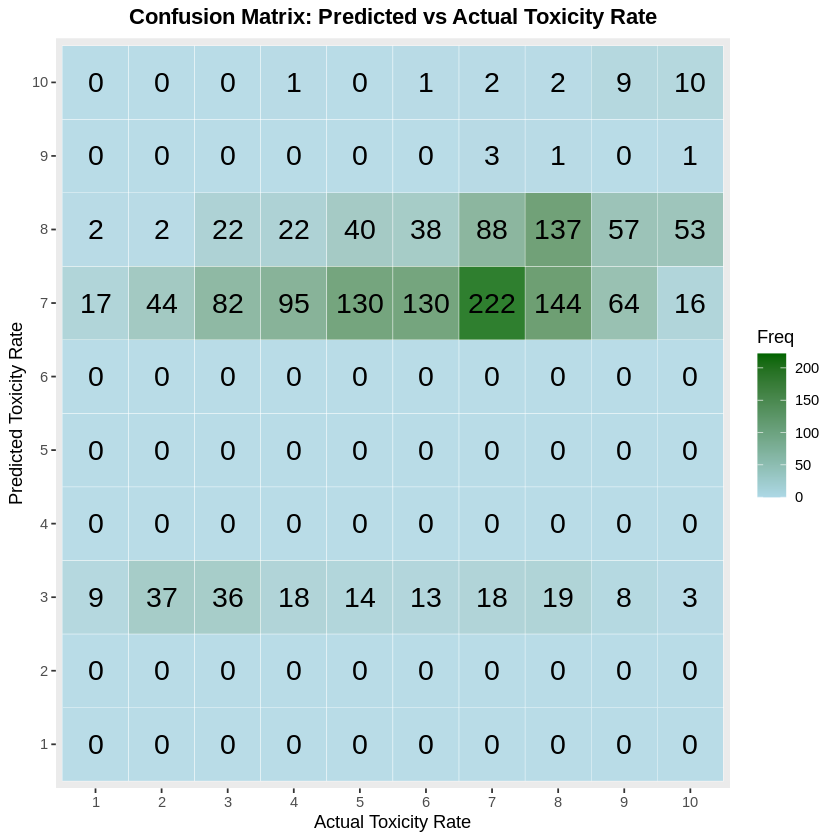

In [8]:
ggplot(conf_matrix, aes(x = Var2, y = predicted_classes, fill = Freq)) +
  geom_tile(color = "white", alpha = 0.8) +
  geom_text(aes(label = Freq), size = 6) +
  labs(title = "Confusion Matrix: Predicted vs Actual Toxicity Rate",
       x = "Actual Toxicity Rate",
       y = "Predicted Toxicity Rate") +
  scale_fill_gradient(low = "lightblue", high = "darkgreen") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        panel.grid = element_blank())

The most accurately predicted toxicity ratings are ratings 7 and 8.

The ratings of 1, 2, 4-6 are never predicted by the model. 9 and 10 are almost never predicted

The rating of 3 is also rare

This can be explained by the specifics of our data: the 7 and 8 classes are the most represented within the dataset, while the others are not as frequent

##MULTINOMIAL MODEL

In [9]:
multi_model_full <- multinom(tox_rate ~ tox_type + response + phrase_types + lex_counts, data = tox)

# weights:  150 (126 variable)
initial  value 3707.162000 
iter  10 value 3294.264822
iter  20 value 3172.013938
iter  30 value 3155.615431
iter  40 value 3151.961639
iter  50 value 3150.669274
iter  60 value 3149.902261
iter  70 value 3149.208616
iter  80 value 3148.970112
iter  90 value 3148.898299
final  value 3148.893182 
converged


In [10]:
summary(multi_model_full)

Call:
multinom(formula = tox_rate ~ tox_type + response + phrase_types + 
    lex_counts, data = tox)

Coefficients:
   (Intercept) tox_typeharassment tox_typehate_speech: gender
2    0.9025468           5.684553                   0.4749396
3    0.8641546           7.098396                   0.7654307
4    0.1698687           6.206865                   0.8042908
5    0.2416333           6.796785                   0.4006372
6   -0.2139120          -7.206972                   0.5899179
7    1.1211653           7.137172                   0.6011693
8    0.5107590           6.744891                   0.3738915
9   -0.8287382           8.213481                   0.1182434
10  -2.3453273           9.790905                  -1.1554384
   tox_typehate_speech: lgbtq* tox_typehate_speech: nationality
2                    -6.336118                       -1.5634733
3                     6.950173                       -0.6969002
4                     6.854390                       -1.0461291
5      

The variables with the strongest positive coefficients are tox_types: harassment and threats (especially in the higher level ratings), hate_speech: religion with the lower positive coefficients encountered in hate_speech: gender, response: post_animate, lex_counts.

The variables with the strongest negative coefficients are tox_types: profanity (especially for rating of 2), response: post_inanimate (especially for rating of 10), hate_speech: lgbtq, nationality.

As for the errors, the highest values can be seen in harassment, hate_speech: lgbtq, race, religion, threat.

Overall, the model doesn't predict our classes well, which may be due to the underrepresentation of several categories and the multicollinearity issue



In [11]:
predicted_classes <- predict(multi_model_full, newdata = tox)
probs <- predict(multi_model_full, newdata = tox, "probs")

conf_matrix <- as.data.frame(table(predicted_classes, tox$tox_rate))

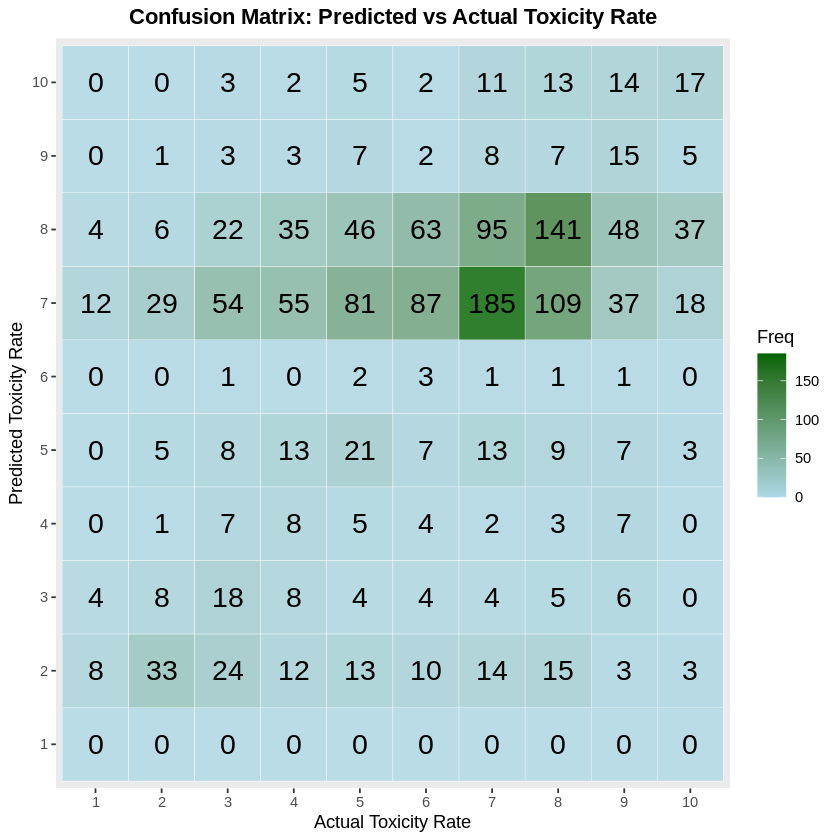

In [12]:
ggplot(conf_matrix, aes(x = Var2, y = predicted_classes, fill = Freq)) +
  geom_tile(color = "white", alpha = 0.8) +
  geom_text(aes(label = Freq), size = 6) +
  labs(title = "Confusion Matrix: Predicted vs Actual Toxicity Rate",
       x = "Actual Toxicity Rate",
       y = "Predicted Toxicity Rate") +
  scale_fill_gradient(low = "lightblue", high = "darkgreen") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        panel.grid = element_blank())

This is similar to the polr model predictions, however, there are fewer ratings that are not predicted and the overall predictions are better distributed across ratings.

It can be noticed that the most accurately predicted toxicity ratings are ratings 7 and 8.

The lowest rating of 1 is never predicted by the model.

#**FEATURE ENGINEERING AND BUILDING A MODEL ON THIS DATA**

Considering the poor quality of predictions and the high error rate, we decideed to perform feature engineering and retrain the model.

In [43]:
tox.engineered <- tox %>%
  mutate(
    tox_group = factor(case_when(
      tox_rate %in% 1:3 ~ "low_tox",
      tox_rate %in% 4:6 ~ "mid_tox",
      tox_rate %in% 7:8 ~ "high_tox",
      tox_rate %in% 9:10 ~ "extreme_tox"
    ), levels = c("low_tox", "mid_tox", "high_tox", "extreme_tox")),
    across(tox_type, as.factor)
  )%>%
  filter(tox_type != "hate_speech: religion")%>%
  mutate(across(where(is.factor), droplevels))

head(tox.engineered)

,text_id,text,tox,tox_rate,response,tox_type,phrases,phrase_types,lexes,lex_counts,tox_group
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,0,Кармодрочеры,Кармодрочеры,4,post: animate,general_insult,Кармодрочеры,direct,Кармодрочеры,1,mid_tox
2,1,"Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.","Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.",5,post: animate,profanity,Да блять !,direct,блять,1,mid_tox
3,1,"Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.","Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.",5,post: animate,profanity,Это дохуя разные вещи,direct,дохуя,1,mid_tox
4,1,"Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.","Да блять ! 🤦 Он не взламывал игры, а симал их. Это дохуя разные вещи . Так что про пирата - тут с ахуенной натяжкой.",5,post: animate,profanity,Так что про пирата - тут с ахуенной натяжкой.,direct,ахуенной,1,mid_tox
5,2,Вы там охуели что-ли за 6500 стрижка ? Это где блять такое?,Вы там охуели что-ли за 6500 стрижка ? Это где блять такое?,8,post: inanimate,profanity,Вы там охуели что-ли за 6500 стрижка,direct,охуели,1,high_tox
6,2,Вы там охуели что-ли за 6500 стрижка ? Это где блять такое?,Вы там охуели что-ли за 6500 стрижка ? Это где блять такое?,8,post: inanimate,profanity,Это где блять такое?,direct,блять,1,high_tox


In [44]:
summary(tox.engineered)

    text_id      
 Min.   :   0.0  
 1st Qu.: 279.0  
 Median : 527.0  
 Mean   : 544.1  
 3rd Qu.: 814.0  
 Max.   :1097.0  
                 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text     
 Игорь, ты? Помнишь меня? Я твой одноклассник. Я узнал тебя по твоим шизоидным словам и высерам . А помнишь, как мы всем классом нассали тебе в кружку в тре

We united the toxicity ratings into four categories (low, medium, high and extreme). This simplification reduces noise and improves interpretability. Additionally, we deleted the tox_type: religion due to its high error rate

##POLR MODEL

In [45]:
polr_cut <- polr(tox_group ~ tox_type + response + phrase_types + lex_counts, data = tox.engineered)

In [46]:
summary(polr_cut)


Re-fitting to get Hessian




Call:
polr(formula = tox_group ~ tox_type + response + phrase_types + 
    lex_counts, data = tox.engineered)

Coefficients:
                                   Value Std. Error t value
tox_typeharassment                1.6006    0.33002  4.8499
tox_typehate_speech: gender      -0.2647    0.13975 -1.8940
tox_typehate_speech: lgbtq*      -0.5697    0.58861 -0.9678
tox_typehate_speech: nationality  0.1863    0.15110  1.2328
tox_typehate_speech: race        -1.5686    0.51507 -3.0453
tox_typeprofanity                 0.3566    0.20448  1.7440
tox_typethreat                    1.4766    0.22560  6.5453
responseperson                   -0.2411    0.14546 -1.6575
responsepost: animate             0.2192    0.13949  1.5712
responsepost: inanimate          -0.2224    0.25684 -0.8659
phrase_typesindirect             -0.6555    0.10097 -6.4924
lex_counts                        0.7479    0.06621 11.2944

Intercepts:
                     Value   Std. Error t value
low_tox|mid_tox      -1.1062  0.15

Not much has changed in terms of positive and negative influence of categories on the toxicity

However, our Residual Deviance and AIC have lowered indicating a better performance

In [47]:
predicted_classes <- predict(polr_cut, newdata = tox.engineered)
probs <- predict(polr_cut, newdata = tox.engineered, "probs")

conf_matrix <- as.data.frame(table(predicted_classes, tox.engineered$tox_group))

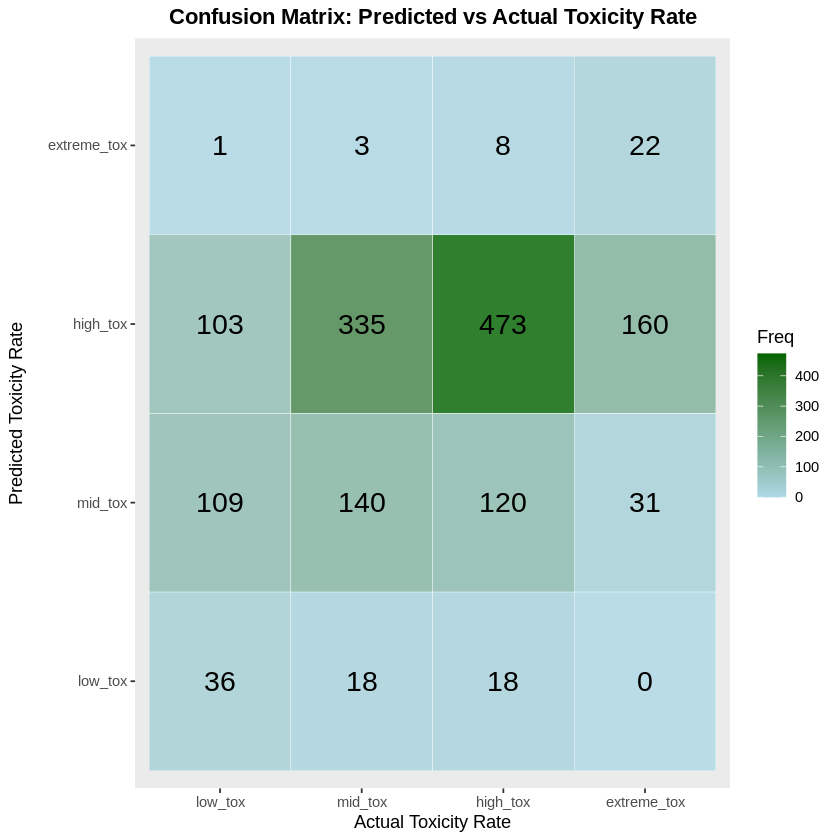

In [48]:
ggplot(conf_matrix, aes(x = Var2, y = predicted_classes, fill = Freq)) +
  geom_tile(color = "white", alpha = 0.8) +
  geom_text(aes(label = Freq), size = 6) +
  labs(title = "Confusion Matrix: Predicted vs Actual Toxicity Rate",
       x = "Actual Toxicity Rate",
       y = "Predicted Toxicity Rate") +
  scale_fill_gradient(low = "lightblue", high = "darkgreen") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        panel.grid = element_blank())

The predictions are better, although the medium and high toxicity groups are still predicted more often

##MULTINOMIAL MODEL

In [49]:
multi_model_cut <- multinom(tox_group ~ tox_type + response + phrase_types + lex_counts, data = tox.engineered)

# weights:  56 (39 variable)
initial  value 2186.186207 
iter  10 value 1886.102245
iter  20 value 1837.214092
iter  30 value 1834.885792
iter  40 value 1834.740635
iter  50 value 1834.705174
final  value 1834.705129 
converged


In [50]:
summary(multi_model_cut)

Call:
multinom(formula = tox_group ~ tox_type + response + phrase_types + 
    lex_counts, data = tox.engineered)

Coefficients:
            (Intercept) tox_typeharassment tox_typehate_speech: gender
mid_tox      -0.5424468          -0.375329                 -0.01695189
high_tox     -0.1720333           0.367299                 -0.10761090
extreme_tox  -2.3263664           2.184286                 -0.75316411
            tox_typehate_speech: lgbtq* tox_typehate_speech: nationality
mid_tox                     -0.07178103                     -0.001186963
high_tox                    -0.57642815                      0.001130015
extreme_tox                -11.40764991                      0.416071533
            tox_typehate_speech: race tox_typeprofanity tox_typethreat
mid_tox                     -1.142570          2.165950       1.206503
high_tox                    -2.903875          2.420297       1.073365
extreme_tox                 -1.620559          1.399729       2.929380
           

The variables with the strongest positive coefficients, while quite low are tox_types: profanity, harassment (for extreme toxicity) and threats.

The variable with the strongest negative coefficients is hate_speech: lgbtq.

As for the errors, the highest values can be seen in post: inanimate (response), threat, but compared to the previous model, there is a significant improvement.

Overall, the model started to predict our classes better after feature engineering.

In [51]:
predicted_classes <- predict(multi_model_cut, newdata = tox.engineered)
probs <- predict(multi_model_cut, newdata = tox.engineered, "probs")

conf_matrix <- as.data.frame(table(predicted_classes, tox.engineered$tox_group))

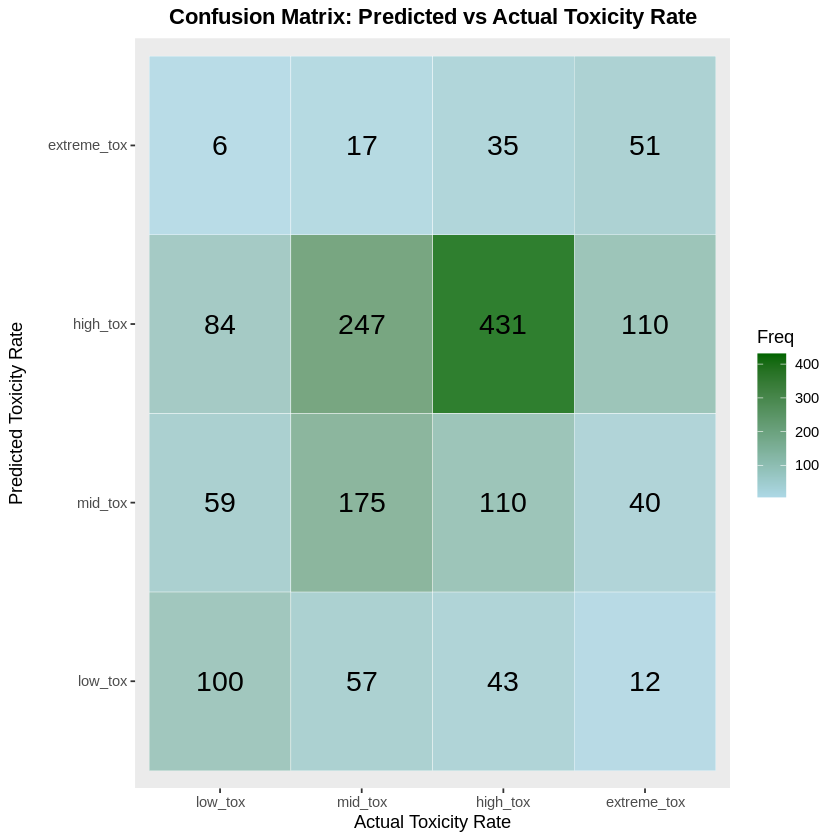

In [52]:
ggplot(conf_matrix, aes(x = Var2, y = predicted_classes, fill = Freq)) +
  geom_tile(color = "white", alpha = 0.8) +
  geom_text(aes(label = Freq), size = 6) +
  labs(title = "Confusion Matrix: Predicted vs Actual Toxicity Rate",
       x = "Actual Toxicity Rate",
       y = "Predicted Toxicity Rate") +
  scale_fill_gradient(low = "lightblue", high = "darkgreen") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        panel.grid = element_blank())

The confusion matrix visualizes the improvement, now the true labels are predicted more often and better than the polr model's results

#**MODEL ON PHRASES**

Then we decided to see if it was possible to build a model to predict our classes based only on phrase types.

##POLR MODEL

In [53]:
polr_phrase <- polr(tox_group ~ phrase_types, data = tox.engineered)

In [54]:
summary(polr_phrase)


Re-fitting to get Hessian




Call:
polr(formula = tox_group ~ phrase_types, data = tox.engineered)

Coefficients:
                       Value Std. Error t value
phrase_typesindirect -0.8306    0.09676  -8.584

Intercepts:
                     Value    Std. Error t value 
low_tox|mid_tox       -2.0499   0.0840   -24.4161
mid_tox|high_tox      -0.4279   0.0634    -6.7512
high_tox|extreme_tox   1.5992   0.0790    20.2331

Residual Deviance: 4002.225 
AIC: 4010.225 

AIC and residual deviance are higher indicating a drop in quality

In [55]:
predicted_classes <- predict(polr_phrase, newdata = tox.engineered)
probs <- predict(polr_phrase, newdata = tox.engineered, "probs")

conf_matrix <- as.data.frame(table(predicted_classes, tox.engineered$tox_group))

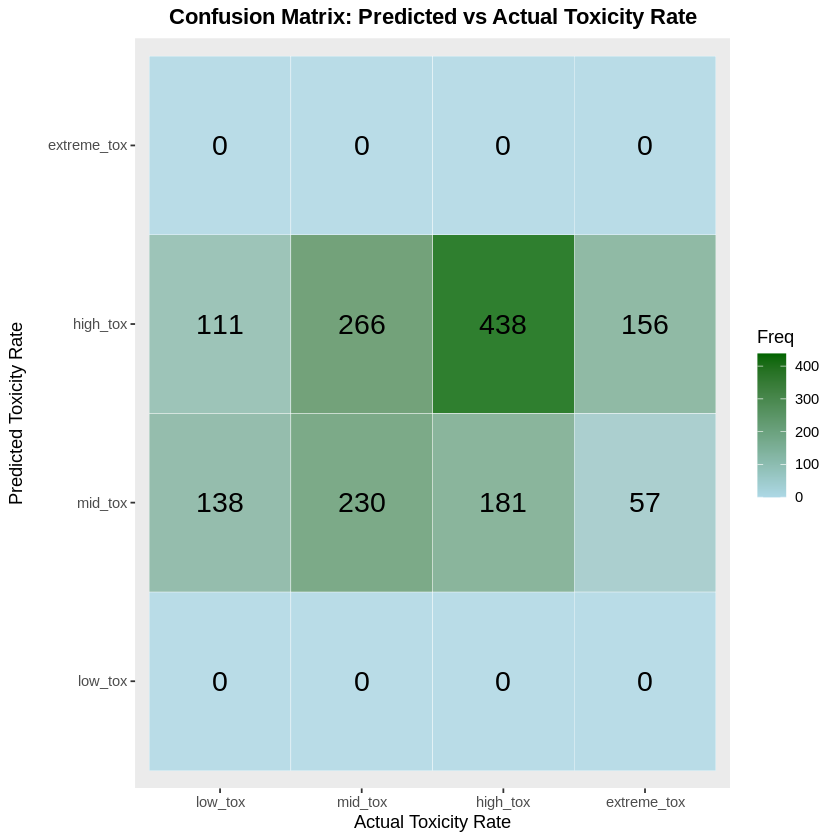

In [56]:
ggplot(conf_matrix, aes(x = Var2, y = predicted_classes, fill = Freq)) +
  geom_tile(color = "white", alpha = 0.8) +
  geom_text(aes(label = Freq), size = 6) +
  labs(title = "Confusion Matrix: Predicted vs Actual Toxicity Rate",
       x = "Actual Toxicity Rate",
       y = "Predicted Toxicity Rate") +
  scale_fill_gradient(low = "lightblue", high = "darkgreen") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        panel.grid = element_blank())

The extreme toxicity and low toxicity were not predicted at all once more which has become a trend in this research

##MULTINOMIAL MODEL

In [57]:
multi_model_phrase <- multinom(tox_group ~ phrase_types, data=tox.engineered)

# weights:  12 (6 variable)
initial  value 2186.186207 
iter  10 value 1999.566647
final  value 1999.565847 
converged


In [58]:
summary(multi_model_phrase)

Call:
multinom(formula = tox_group ~ phrase_types, data = tox.engineered)

Coefficients:
            (Intercept) phrase_typesindirect
mid_tox       0.8739776           -0.3631635
high_tox      1.3726817           -1.1014487
extreme_tox   0.3403013           -1.2245517

Std. Errors:
            (Intercept) phrase_typesindirect
mid_tox       0.1129970            0.1560847
high_tox      0.1062642            0.1551233
extreme_tox   0.1241747            0.2005247

Residual Deviance: 3999.132 
AIC: 4011.132 

The highest values of errors can be seen in extremee toxicity in both of the categories.

In [59]:
predicted_classes <- predict(multi_model_phrase, newdata = tox.engineered)
probs <- predict(multi_model_phrase, newdata = tox.engineered, "probs")

conf_matrix <- as.data.frame(table(predicted_classes, tox.engineered$tox_group))

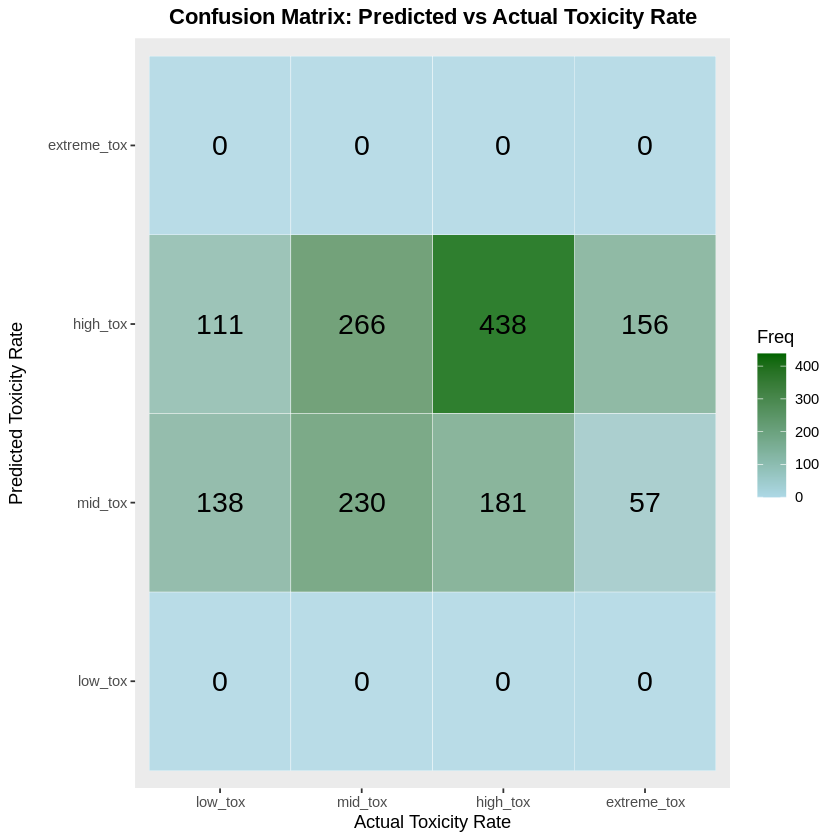

In [60]:
ggplot(conf_matrix, aes(x = Var2, y = predicted_classes, fill = Freq)) +
  geom_tile(color = "white", alpha = 0.8) +
  geom_text(aes(label = Freq), size = 6) +
  labs(title = "Confusion Matrix: Predicted vs Actual Toxicity Rate",
       x = "Actual Toxicity Rate",
       y = "Predicted Toxicity Rate") +
  scale_fill_gradient(low = "lightblue", high = "darkgreen") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        panel.grid = element_blank())

Phrase types don't seem to predict toxicity ratings very well, only the most represented ones: medium toxicity and high toxicity, while not predicting extreme toxicity at all, which is once again due to the representation of these types within our data.

#**MODEL COMPARISON**

In order to fully grasp which model is better, we used AIC to measure that difference.

In [62]:
aic_table <- AIC(multi_model_full, multi_model_cut, multi_model_phrase, polr_cut, polr_full, polr_phrase)
aic_table$delta_AIC <- aic_table$AIC - min(aic_table$AIC)


Warning message in AIC.default(multi_model_full, multi_model_cut, multi_model_phrase, :
“models are not all fitted to the same number of observations”


In [63]:
AIC(multi_model_full, multi_model_cut, multi_model_phrase, polr_cut, polr_full, polr_phrase)

Warning message in AIC.default(multi_model_full, multi_model_cut, multi_model_phrase, :
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
multi_model_full,126,6549.786
multi_model_cut,39,3747.410
multi_model_phrase,6,4011.132
polr_cut,15,3800.018
polr_full,22,6601.059
polr_phrase,4,4010.225


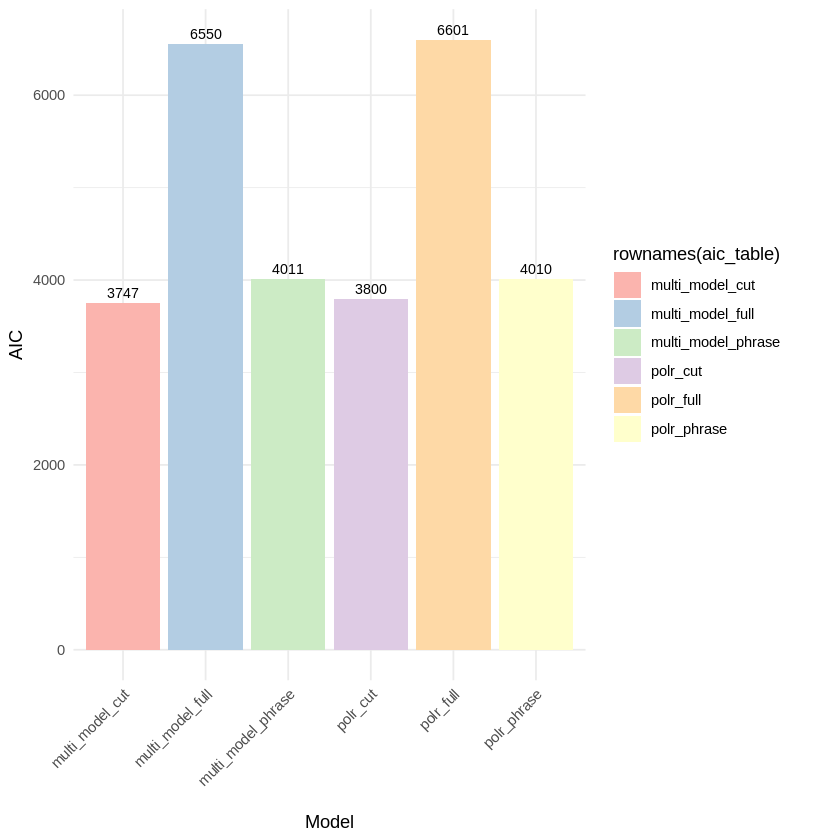

In [64]:
ggplot(aic_table, aes(x = rownames(aic_table), y = AIC, fill = rownames(aic_table))) +
  geom_col() +
  labs(x = "Model", y = "AIC") +
  theme_minimal()+
  geom_text(aes(label = round(AIC)), vjust = -0.5, size = 3) +
  scale_fill_brewer(palette = "Pastel1")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The best model is multi_model_cut - the model built on data after feature engineering (AIC = 3747.410), suggesting it explains the data best without overfitting.

polr_cut (AIC = 3800.018) is simpler but is close in performance.

multi_model_full and polr_full have high AIC values, indicating they’re too complex for little gain.

multi_model_phrase and polr_phrase are too simplistic (high AIC despite low df).

#DISCUSSION

There are other toxic comment datasets in Russian, for instance, https://www.kaggle.com/datasets/alexandersemiletov/toxic-russian-comments

This dataset contains labelled comments from the  social network ok.ru.

The data was used in a competition where participants had to automatically label each comment with at least one of the four predefined classes. The classes represent different levels of toxicity.

Each comment belongs to one of the following classes, with each label complying with the fastText formatting rules:

*   __label __NORMAL - neutral user comments

*   __label __INSULT - comments that humiliate a person

*   __label __THREAT - comments with an explicit intent to harm another person

*   __label __OBSCENITY - comments that contain a description or a threat of a sexual assault

------

Our data can be used for a similar task of classification alongside with regression as we have shown in our research. However, I believe that these tasks would be more complex, considering the diversity of toxicity types (9 compared to 4 in the toxic-russian-comments dataset), and more precise due to the amount of additional information accompanying the comments.

------

All in all, the conducted analysis shows interesting patterns and proves that our data can be used for machine learning tasks.

Tools of toxic comment classification and tag/rating prediction (regression) are quite valuable in the digital age as plenty of companies need to detect toxicity on their platforms: from automatic e-mail filtering to cleaning up review- and comment sections